In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


'''1. Generate data: Simulate a binary classification problem by generating a vector of class labels. Size 100. '''
y = np.random.randint(2, size=100)


'''Generate a vector of predictor estimates using a random number generator. **(5 Points)**'''
# x -> 4 features, 100 instances.
x = np.array([np.random.randint(5,size=100), np.random.randint(3,size=100), 
              np.random.randint(10,size=100), np.random.randint(4,size=100)]).T

# Use MLP Classifier for this simulation
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(x, y)

# Generate vector of predictions
y_pred = clf.predict(x)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


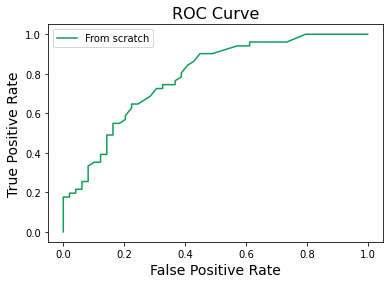

In [12]:
'''2. Calculate and plot ROC and Precision-Recall curves. **(20 Points)**'''
import sklearn

# Return a matrix with true positives (Recall)
def get_recall(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, True) & np.equal(y_test, True)
    false_negative = np.equal(threshold_vector, False) & np.equal(y_test, True)
    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    return tpr

# Return a matrix with false positives
def get_false_positive(threshold_vector, y_test):
    true_negative = np.equal(threshold_vector, False) & np.equal(y_test, False)
    false_positive = np.equal(threshold_vector, True) & np.equal(y_test, False)
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())
    return fpr

# Precision = TruePositives / (TruePositives + FalsePositives)
def get_precision(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, True) & np.equal(y_test, True)
    false_positive = np.equal(threshold_vector, True) & np.equal(y_test, False)
    pres = true_positive.sum() / (true_positive.sum() + false_positive.sum())
    return pres


# Get the roc matrix
def roc_from_scratch(probabilities, y_test, partitions=200):
    roc = np.array([])
    # For each partition on the graph:
    for i in range(partitions + 1):
        # Get a vector with True values where probabilities are > current partition and False values otherwise
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        
        tpr = get_recall(threshold_vector, y_test)
        fpr = get_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
    return roc.reshape(-1, 2)

# ROC From scratch
probabilities = clf.predict_proba(x)[:, 1]
ROC = roc_from_scratch(probabilities ,y ,partitions=200)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58', label="From scratch")
plt.title('ROC Curve',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.legend()




<ipython-input-12-33bb0b471a2e>:22: RuntimeWarning: invalid value encountered in long_scalars
  pres = true_positive.sum() / (true_positive.sum() + false_positive.sum())


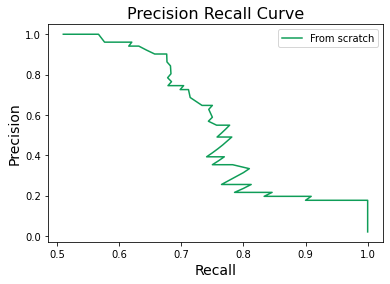

In [17]:
# Get the precision recall matrix
def get_precision_recall(probabilities, y_test, partitions=200):
    op = np.array([])
    # For each partition on the graph:
    for i in range(partitions + 1):
        # Get a vector with True values where probabilities are > current partition and False values otherwise
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        
        prec = get_precision(threshold_vector, y_test)
        recall = get_recall(threshold_vector, y_test)
        op = np.append(op, [prec, recall])
    return op.reshape(-1, 2)# Precision Recall From scratch

    
probabilities = clf.predict_proba(x)[:, 1]
PR = get_precision_recall(probabilities, y, partitions=200)
plt.plot(PR[:,0],PR[:,1],color='#0F9D58', label="From scratch")
plt.title('Precision Recall Curve',fontsize=16)
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
plt.legend()

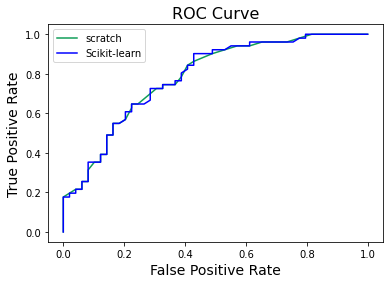

In [3]:
'''3. Match your curve generated with sklearn. **(5 Points)**
ROC CURVE
'''


# From scratch
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58', label="scratch")

# Sklearn implementation
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y, probabilities)
plt.plot(fpr, tpr, color="blue", label="Scikit-learn")

plt.title('ROC Curve',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.legend()

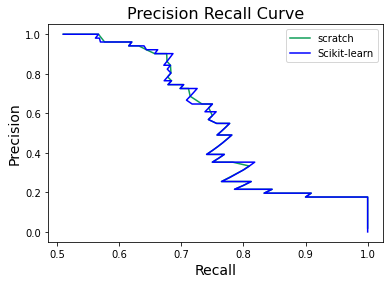

In [18]:
'''3. Match your curve generated with sklearn. **(5 Points)**
PRECISION RECALL CURVE
'''


# From scratch
plt.plot(PR[:,0],PR[:,1],color='#0F9D58', label="scratch")

# Sklearn implementation
prec, recall, thresholds = sklearn.metrics.precision_recall_curve(y, probabilities)
plt.plot(prec, recall, color="blue", label="Scikit-learn")

plt.title('Precision Recall Curve',fontsize=16)
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
plt.legend()